### Linear vs Non-Linear Model (What Changed)

**Earlier (Linear model)**
- No activation functions  
- Straight-line decision boundary  
- `make_circles` is non-linear → model cannot separate classes  
- Loss plateaus, accuracy stays low  

**Now (Non-linear model)**
- Added hidden layers + activation  
- Curved decision boundary possible  
- Model learns circle structure  
- Loss → ~0, accuracy → ~99–100%

**Core takeaway**
> Non-linearity enables learning non-linear data  
> Linear models fail by design, not by tuning


### Imports & Setup
Imports required libraries, sets random seeds for reproducibility, and selects the computation device (CPU/GPU).


In [414]:
# importing
try: 
    import torch
    import numpy
    import matplotlib.pyplot as plt
    from torch import nn # nn-> all te building blocks for a neural network
    from pathlib import Path
    import sklearn
    from sklearn.datasets import make_circles # to create a toy dataset
    from sklearn.model_selection import train_test_split
    import pandas as pd
    print("Done Successfully")
except Exception as e:
    print("Failed to import",e)

Done Successfully


### Dataset Preparation
Generates the synthetic `make_circles` dataset, splits it into training and testing sets, and converts everything to PyTorch tensors.



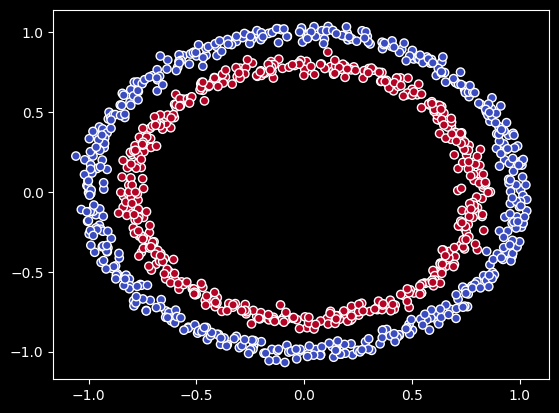

In [415]:
# make 1000 samples 
n=1000
# create circles 
X, y= make_circles(n,
                   noise=0.03,
                  random_state=42) 
# visualise our data
plt.style.use("dark_background")
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap="coolwarm",
    edgecolors="white"
);

In [416]:
# convert data to tensors and then to train and test
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

# split into training and testing randomly by sklearn's train_test_split method 
X_train, X_test, y_train, y_test= train_test_split(X,
                                                   y, 
                                                   test_size=0.2, # percentage of data to be used for testing purpose, eg 0.5 would be for a 50-50 split
                                                   random_state=42)
print(len(X_train),len(X_test), len(y_train), len(y_test)) 

800 200 800 200


### Model Definition
Defines the neural network architecture by subclassing `nn.Module`, specifying layers and the forward data flow.



In [417]:
# device agnostic code 
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [418]:
'''# create a model with non linearity support
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2, out_features=30)
        self.layer2=nn.Linear(in_features=30, out_features=30)
        self.layer3=nn.Linear(in_features=30, out_features=30)
        self.layer4=nn.Linear(in_features=30, out_features=30)
        self.layer5=nn.Linear(in_features=30, out_features=1)
        self.relu=nn.ReLU() #ReLU is a non linear function

    def forward(self, x):
        return self.layer5(self.relu(self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))))

model3=CircleModel().to(device)
model3'''

# lets try less and in multiple of 8 and sequential
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

### Loss Function & Optimizer
Initializes the loss function (binary classification) and the optimizer used to update model weights.



In [419]:
# setup a loss function and an optimizer
loss_fn=nn.BCEWithLogitsLoss()

#optimizer=torch.optim.SGD(model3.parameters(),lr=0.3)
# lets try adam 
optimizer=torch.optim.Adam(model3.parameters(),lr=0.01)

### Training Loop, Evaluation / Testing and Metrics Logging

- Runs forward pass, computes loss, performs backpropagation, and updates weights for each epoch.
- Switches the model to evaluation mode, disables gradient tracking, and computes test loss and accuracy.
- Prints training and testing metrics at fixed intervals to monitor learning progress.

In [420]:
# train the model with non-linearity
# set up random seeds 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all the data on the device
X_train, X_test= X_train.to(device), X_test.to(device)
y_train, y_test= y_train.to(device), y_test.to(device)

# training loop 
epochs=24
for epoch in range(epochs):
    # set the model to training mode 
    model3.train()

    # forward pass
    y_logits= model3(X_train).squeeze()
    y_preds=torch.round(torch.sigmoid(y_logits))

    # loss
    loss=loss_fn(y_logits,y_train)

    #optimizer to zero_grad
    optimizer.zero_grad()

    # loss backwards
    loss.backward()

    #optimizer step
    optimizer.step()

    # testing
    
    # set the model to evaluation omode
    model3.eval()
    with torch.inference_mode():
        y_test_logits=model3(X_test).squeeze()
        y_test_preds=torch.round(torch.sigmoid(y_test_logits))

        test_loss=loss_fn(y_test_logits, y_test)

    if epoch%1==0:
        print(f'Epoch: {epoch} \t | Loss: {loss:.4F} \t | test_loss: {test_loss:.4F}')

Epoch: 0 	 | Loss: 0.0000 	 | test_loss: 0.0531
Epoch: 1 	 | Loss: 0.0003 	 | test_loss: 0.0016
Epoch: 2 	 | Loss: 0.0000 	 | test_loss: 0.0227
Epoch: 3 	 | Loss: 0.0004 	 | test_loss: 0.0126
Epoch: 4 	 | Loss: 0.0000 	 | test_loss: 0.0045
Epoch: 5 	 | Loss: 0.0000 	 | test_loss: 0.0021
Epoch: 6 	 | Loss: 0.0000 	 | test_loss: 0.0323
Epoch: 7 	 | Loss: 0.0000 	 | test_loss: 0.0787
Epoch: 8 	 | Loss: 0.0000 	 | test_loss: 0.0524
Epoch: 9 	 | Loss: 0.0000 	 | test_loss: 0.0322
Epoch: 10 	 | Loss: 0.0000 	 | test_loss: 0.0196
Epoch: 11 	 | Loss: 0.0001 	 | test_loss: 0.0137
Epoch: 12 	 | Loss: 0.0000 	 | test_loss: 0.0100
Epoch: 13 	 | Loss: 0.0000 	 | test_loss: 0.0071
Epoch: 14 	 | Loss: 0.0000 	 | test_loss: 0.0048
Epoch: 15 	 | Loss: 0.0000 	 | test_loss: 0.0032
Epoch: 16 	 | Loss: 0.0000 	 | test_loss: 0.0021
Epoch: 17 	 | Loss: 0.0000 	 | test_loss: 0.0014
Epoch: 18 	 | Loss: 0.0000 	 | test_loss: 0.0010
Epoch: 19 	 | Loss: 0.0000 	 | test_loss: 0.0007
Epoch: 20 	 | Loss: 0.0000 	 |

### Visualization (Optional)
Plots decision boundaries and predictions to visually assess model performance.

Requirement alread satisfied


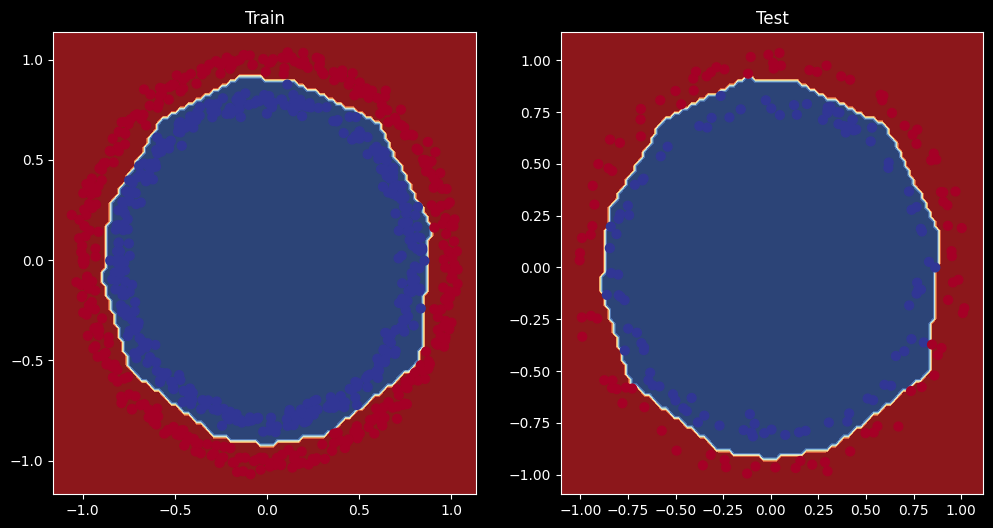

In [ ]:
# looks like our model isnt learning anything, so lets make  some predictions and plot them 
# plot decision boundary
import requests
from pathlib import Path

# download helper function from pytorch repo if not already downloaded
if Path("helper_functions.py").is_file():
    print("Requirement alread satisfied")
else: 
    print("Downloading helper_functions.py")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model3, X_test, y_test)